  # Projet de Mod√©lisation Supervis√©e : Pr√©diction du Statut des R√©servations

## Contexte

Une entreprise de transport (type Uber/Bolt) rencontre des pertes importantes √† cause de r√©servations annul√©es, incompl√®tes ou sans chauffeur disponible.  
L'objectif est de pr√©dire √† l'avance si une r√©servation sera compl√©t√©e ou non, en fonction des caract√©ristiques du trajet, afin de r√©duire les pertes et am√©liorer la satisfaction client.

## Probl√©matique M√©tier

Comment pr√©dire le statut d'une r√©servation (`Completed` ou `Not Completed`) en utilisant les informations disponibles sur la course : type de v√©hicule, distance, localisation, m√©thode de paiement, notes des clients et des chauffeurs, etc. ?

## Parties Prenantes

- **Direction de l‚Äôentreprise** : souhaite r√©duire les pertes financi√®res li√©es aux annulations.  
- **√âquipe op√©rationnelle** : souhaite comprendre les causes principales des annulations pour ajuster la planification des chauffeurs.  
- **Clients et chauffeurs** : b√©n√©ficient d‚Äôune meilleure exp√©rience gr√¢ce √† moins d‚Äôannulations surprises.

## Objectifs du Projet

1. Explorer et nettoyer le dataset pour pr√©parer les donn√©es.  
2. Construire un mod√®le de classification supervis√© pour pr√©dire le statut d‚Äôune r√©servation.  
3. Interpr√©ter les r√©sultats pour identifier les facteurs influen√ßant les annulations.  
4. Analyser les raisons textuelles des annulations √† l‚Äôaide de NLP.  
5. Estimer la valeur des r√©servations compl√©t√©es via un mod√®le de r√©gression.

## Plan de Travail

1. Pr√©paration des donn√©es (nettoyage, encodage, cr√©ation de variables).  
2. Exploration des donn√©es (EDA) et visualisations.  
3. Mod√©lisation supervis√©e (Random Forest, XGBoost, etc.).  
4. √âvaluation des mod√®les (accuracy, F1-score, confusion matrix).  
5. Interpr√©tation des r√©sultats (SHAP).  
6. Conclusion et recommandations business.


# 1. Chargement du Dataset et Aper√ßu des Donn√©es

Dans cette section, nous allons :  
- Charger le fichier CSV contenant les r√©servations.  
- Afficher les premi√®res lignes pour comprendre la structure des donn√©es.  
- Identifier les colonnes et les types de donn√©es.  
- V√©rifier la pr√©sence de valeurs manquantes.


In [12]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#from sklearn.impute import SimpleImputer
import shap

# Charger le dataset
df = pd.read_csv("ncr_ride_bookings.csv")

# Afficher un aper√ßu des 5 premi√®res lignes
df.head()

#Copier le dataset original pour ne pas perdre les donn√©es brutes
df.copy()

Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Location      Drop Location  Avg VTAT  \
0               eBike             Palam Vihar            Jhilmil       NaN   
1            Go Sedan           Shastri Nagar  Gurgaon Sector 56       4.9   
2                Auto                 Khandsa      Malviya Nagar      13.4   
3       Premier Sedan     Central Secretariat           Inderlok      13.1   
4                Bike        Ghitorni Village        Khan Market       5.3   
...               ...                     ...                ...       ...   
149995        Go Mini                 MG Road           Ghitorni      10.2   
149996        Go Mini        Golf Course Road         Akshardham       5.1   
149997       Go Sedan  Satguru Ram Singh Marg           Jor Bagh       2.7   
149998           Auto               Ghaziabad         Saidulajab       6.9   
149999  Premier Sedan         Ashok Park Main  Gurgaon Sector 29       3.5   

        Avg CTAT  ...  Reason for cancelling by Customer  \
0            NaN  ...                                NaN   
1           14.0  ...                                NaN   
2           25.8  ...                                NaN   
3           28.5  ...                                NaN   
4           19.6  ...                                NaN   
...          ...  ...                                ...   
149995      44.4  ...                                NaN   
149996      30.8  ...                                NaN   
149997      23.4  ...                                NaN   
149998      39.6  ...                                NaN   
149999      33.7  ...                                NaN   

       Cancelled Rides by Driver  Driver Cancellation Reason Incomplete Rides  \
0                            NaN                         NaN              NaN   
1                            NaN                         NaN              1.0   
2                            NaN                         NaN              NaN   
3                            NaN                         NaN              NaN   
4                            NaN                         NaN              NaN   
...                          ...                         ...              ...   
149995                       NaN                         NaN              NaN   
149996                       NaN                         NaN              NaN   
149997                       NaN                         NaN              NaN   
149998                       NaN                         NaN              NaN   
149999                       NaN                         NaN              NaN   

        Incomplete Rides Reason Booking Value  Ride Distance  Driver Ratings  \
0                           NaN           NaN            NaN             NaN   
1             Vehicle Breakdown         237.0           5.73             NaN   
2                           NaN         627.0          13.58             4.9   
3                           NaN         416.0          34.02             4.6   
4                           NaN         737.0          48.

In [13]:
# Informations sur le dataset : colonnes, types de donn√©es, valeurs non nulles
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [14]:
# V√©rifier le nombre de valeurs manquantes par colonne
df.isnull().sum()


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [15]:
# Statistiques descriptives des colonnes num√©riques
df.describe()


Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  139500.000000  102000.000000                      10500.0   
mean        8.456352      29.149636                          1.0   
std         3.773564       8.902577                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.300000      21.600000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.300000      36.800000                          1.0   
max        20.000000      45.000000                          1.0   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count                    27000.0            9000.0  102000.000000   
mean                         1.0               1.0     508.295912   
std                          0.0               0.0     395.805774   
min                          1.0               1.0      50.000000   
25%                          1.0               1.0     234.000000   
50%                          1.0               1.0     414.000000   
75%                          1.0               1.0     689.000000   
max                          1.0               1.0    4277.000000   

       Ride Distance  Driver Ratings  Customer Rating  
count  102000.000000    93000.000000     93000.000000  
mean       24.637012        4.230992         4.404584  
std        14.002138        0.436871         0.437819  
min         1.000000        3.000000         3.000000  
25%        12.460000        4.100000         4.200000  
50%        23.720000        4.300000         4.500000  
75%        36.820000        4.600000         4.800000  
max        50.000000        5.000000         5.000000

# 2. Pr√©paration et Nettoyage des Donn√©es

Dans cette section, nous allons :  
- Nettoyer les valeurs manquantes.  
- Encoder les variables cat√©gorielles.  
- Cr√©er la variable cible binaire `Booking_Status_Binary`.  
- Pr√©parer les donn√©es pour la mod√©lisation.


In [16]:
#Gestion des valeurs manquantes

In [17]:
# Colonnes num√©riques
numeric_cols = ['Ride Distance', 'Booking Value', 'Driver Ratings', 'Customer Rating']

# # Remplacer les NaN par la m√©diane
# for col in numeric_cols:
#df[col] = df[col].fillna(data[col].median())


In [26]:
# Colonnes num√©riques li√©es aux annulations/incompletes
num_cols = ['Cancelled Rides by Driver', 'Incomplete Rides']
for col in num_cols:
    df[col] = df[col].fillna(0)

# Colonnes textuelles li√©es aux raisons
text_cols = ['Driver Cancellation Reason', 'Incomplete Rides Reason']
for col in text_cols:
    df[col] = df[col].fillna('Unknown')


In [27]:

# V√©rifier qu'il ne reste plus de valeurs manquantes
df[text_cols + num_cols].isnull().sum()



Driver Cancellation Reason    0
Incomplete Rides Reason       0
Cancelled Rides by Driver     0
Incomplete Rides              0
dtype: int64

Cr√©ation de la cible binaire

In [29]:

# Copier le dataset pour s√©curit√©
model_data = df.copy()
# Cr√©er la cible binaire
model_data['Booking_Status_Binary'] = model_data['Booking Status'].apply(lambda x: 1 if x == 'Completed' else 0)
# Identifier les colonnes non num√©riques
categorical_cols = model_data.select_dtypes(include=['object']).columns

# Num√©riques ‚Üí median
num_cols = model_data.select_dtypes(include=['int64','float64']).columns
model_data[num_cols] = model_data[num_cols].fillna(model_data[num_cols].median())

# Cat√©gorielles ‚Üí "Unknown"
cat_cols = model_data.select_dtypes(include=['object']).columns
model_data[cat_cols] = model_data[cat_cols].fillna("Unknown")

# Encoder toutes les colonnes cat√©gorielles
le = LabelEncoder()
for col in categorical_cols:
    model_data[col] = le.fit_transform(model_data[col].astype(str))

# V√©rification finale
print(model_data.dtypes)
model_data.head()


Date                                   int32
Time                                   int32
Booking ID                             int32
Booking Status                         int32
Customer ID                            int32
Vehicle Type                           int32
Pickup Location                        int32
Drop Location                          int32
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer      int32
Cancelled Rides by Driver            float64
Driver Cancellation Reason             int32
Incomplete Rides                     float64
Incomplete Rides Reason                int32
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                         int32
Booking_Status_Binary                  int64
dtype: obj

Date   Time  Booking ID  Booking Status  Customer ID  Vehicle Type  \
0    82  27223       80398               4        16198             6   
1   333  44812        5340               3        59522             3   
2   235  15712      123807               2       135726             0   
3   294  42274      130594               2        26449             4   
4   259  58545       15756               2       147677             1   

   Pickup Location  Drop Location  Avg VTAT  Avg CTAT  ...  \
0              116             68       8.3      28.8  ...   
1              149             47       4.9      14.0  ...   
2               80             90      13.4      25.8  ...   
3               21             60      13.1      28.5  ...   
4               39             79       5.3      19.6  ...   

   Cancelled Rides by Driver  Driver Cancellation Reason  Incomplete Rides  \
0                        0.0                           4               0.0   
1                        0.0                           4               1.0   
2                        0.0                           4               0.0   
3                        0.0                           4               0.0   
4                        0.0                           4               0.0   

   Incomplete Rides Reason  Booking Value  Ride Distance  Driver Ratings  \
0                        2          414.0          23.72             4.3   
1                        3          237.0           5.73             4.3   
2                        2          627.0          13.58             4.9   
3                        2          416.0          34.02             4.6   
4                        2          737.0          48.21             4.1   

   Customer Rating  Payment Method  Booking_Status_Binary  
0              4.5               5                      0  
1              4.5               3                      0  
2              4.9               2                      1  
3              5.0               3                      1  
4              4.3               3                      1  

[5 rows x 22 columns]

# 3. Exploration des Donn√©es (EDA)

L'objectif de cette √©tape est de :  
- Comprendre la distribution des statuts de r√©servation.  
- Identifier les facteurs qui influencent les annulations ou courses incompl√®tes.  
- Examiner les relations entre les variables num√©riques et la cible.  
- Visualiser les corr√©lations entre les features.


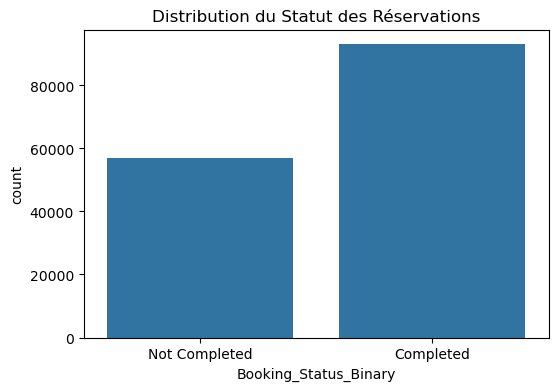

In [30]:
# Distribution Booking_Status_Binary
plt.figure(figsize=(6,4))
sns.countplot(x='Booking_Status_Binary', data=model_data)
plt.xticks([0,1], ['Not Completed', 'Completed'])
plt.title("Distribution du Statut des R√©servations")
plt.savefig('cible.png')
plt.show()

In [31]:
#Analyse des variables cat√©gorielles

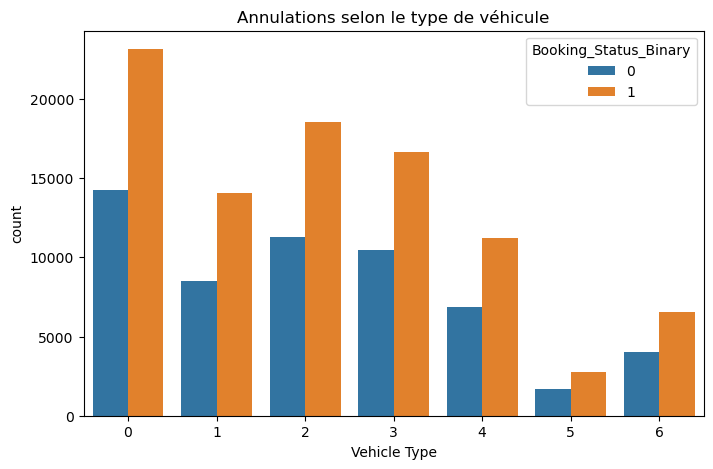

In [32]:
# Exemple : Vehicle Type vs Statut de r√©servation
plt.figure(figsize=(8,5))
sns.countplot(x='Vehicle Type', hue='Booking_Status_Binary', data=model_data)
plt.title("Annulations selon le type de v√©hicule")
plt.show()


In [33]:
#Analyse des variables num√©riques

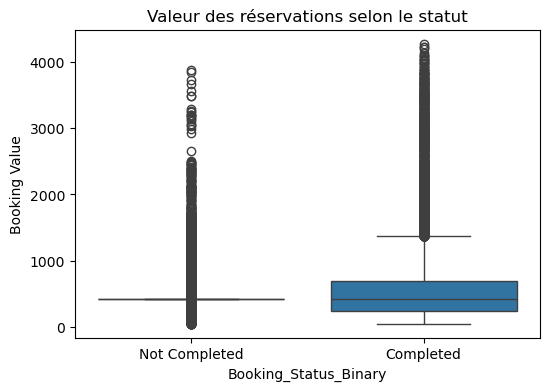

In [34]:
# Boxplot Booking Value vs Statut de r√©servation
plt.figure(figsize=(6,4))
sns.boxplot(x='Booking_Status_Binary', y='Booking Value', data=model_data)
plt.xticks([0,1], ['Not Completed', 'Completed'])
plt.title("Valeur des r√©servations selon le statut")
plt.show()

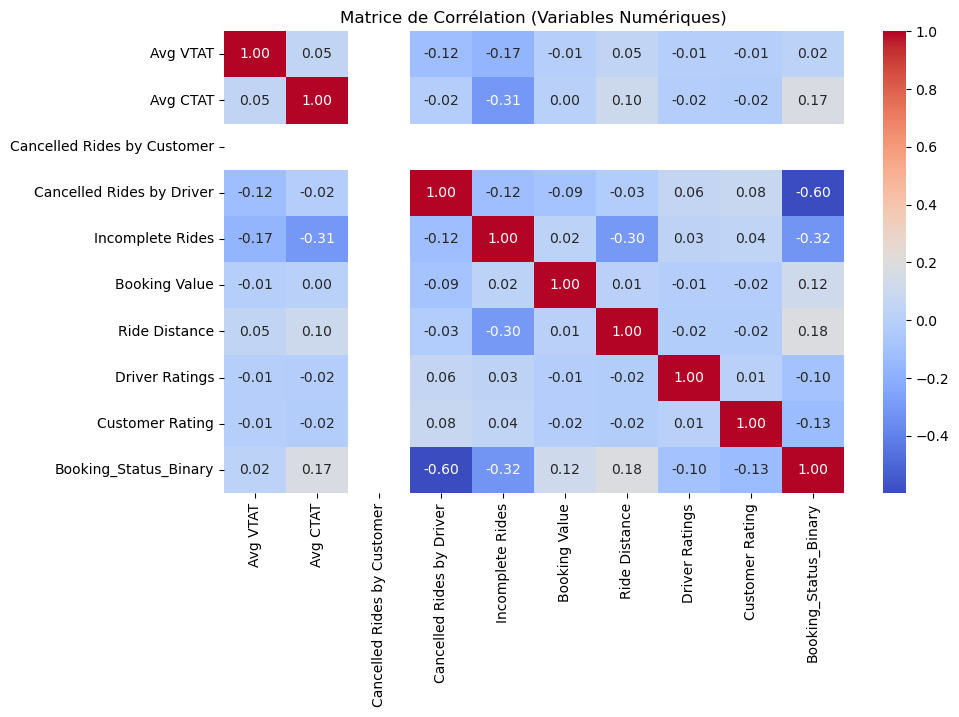

In [35]:
# S√©lectionner uniquement les colonnes num√©riques
numeric_data = model_data.select_dtypes(include=['int64','float64'])

# Matrice de corr√©lation
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de Corr√©lation (Variables Num√©riques)")
plt.show()



5. Mod√©lisation : Random Forest & XGBoost

Objectifs :
- S√©parer les donn√©es en train/test.
- Entra√Æner deux mod√®les (Random Forest et XGBoost).
- Comparer leurs performances avec des m√©triques : Accuracy, Precision, Recall, F1-score.
- Interpr√©ter les features importantes.

In [36]:
df['Booking Status'] = df['Booking Status'].str.strip().str.title()
model_data['Booking_Status_Binary'] = df['Booking Status'].apply(lambda x: 1 if x == 'Completed' else 0)

model_data['Booking_Status_Binary'].value_counts()


Booking_Status_Binary
1    93000
0    57000
Name: count, dtype: int64

**S√©paration features / cible**

In [37]:
# Exclure la cible et les colonnes inutiles (IDs d√©j√† encod√©s ou non pertinentes)
X = model_data.drop(columns=['Booking_Status_Binary', 'Booking Status'])
y = model_data['Booking_Status_Binary']

print("Nombre de features:", X.shape[1])
print("Distribution cible:\n", y.value_counts())


Nombre de features: 20
Distribution cible:
 Booking_Status_Binary
1    93000
0    57000
Name: count, dtype: int64


**Train/Test Split**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120000, 20)
Test shape: (30000, 20)


**Random Forest**

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11400
           1       1.00      1.00      1.00     18600

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



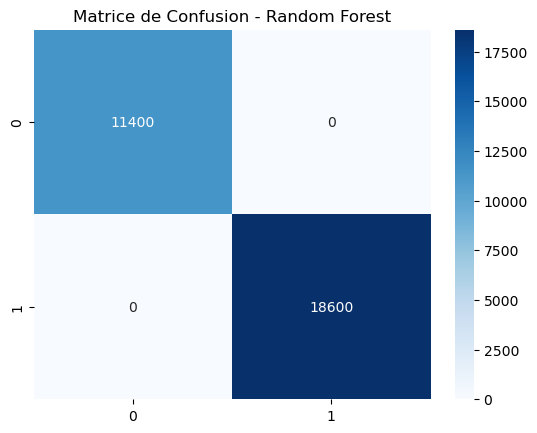

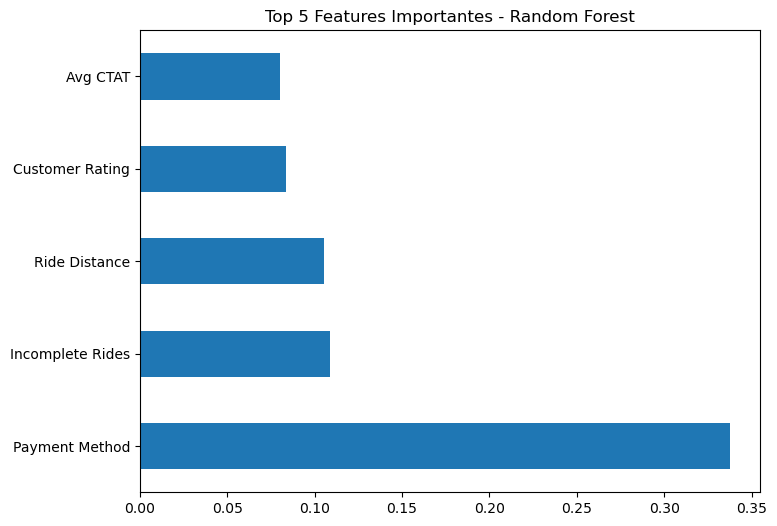

In [39]:
# Entra√Ænement
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Pr√©dictions
y_pred_rf = rf.predict(X_test)

# √âvaluation
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion - Random Forest")
plt.show()

# Importance des features
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(5).plot(kind='barh', figsize=(8,6))
plt.title("Top 5 Features Importantes - Random Forest")
plt.show()


**XGBoost**

C:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:08:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11400
           1       1.00      1.00      1.00     18600

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



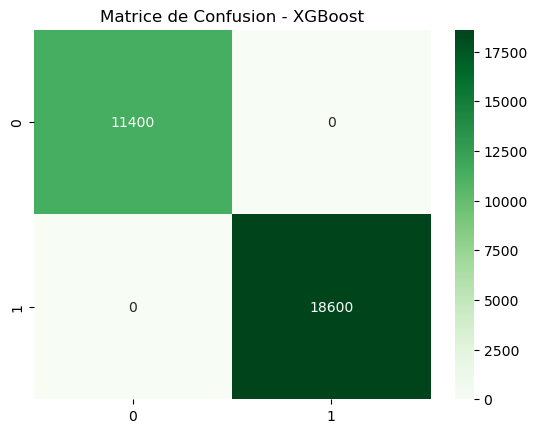

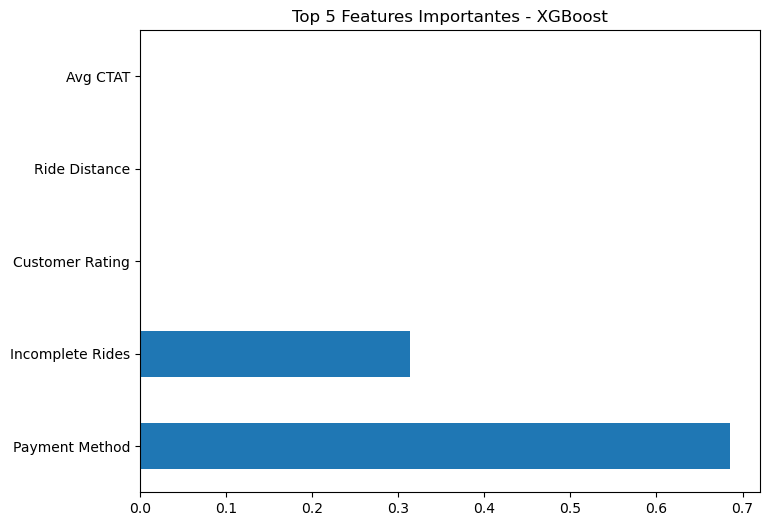

In [40]:


# Entra√Ænement
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# Pr√©dictions
y_pred_xgb = xgb.predict(X_test)

# √âvaluation
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("Matrice de Confusion - XGBoost")
plt.show()

# Importance des features
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importances.nlargest(5).plot(kind='barh', figsize=(8,6))
plt.title("Top 5 Features Importantes - XGBoost")
plt.show()


**Comparaison des Mod√®les**

               Accuracy  Precision  Recall  F1-score
Random Forest       1.0        1.0     1.0       1.0
XGBoost             1.0        1.0     1.0       1.0


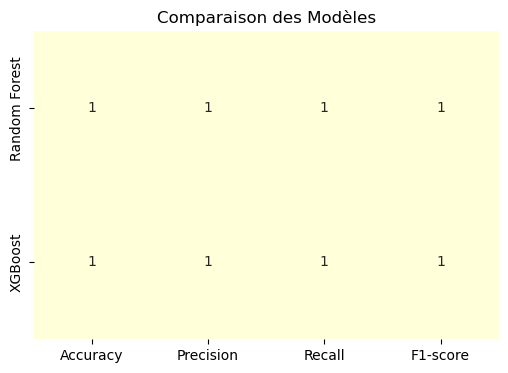

In [41]:

# Fonction pour calculer les m√©triques
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Calcul des m√©triques
metrics_rf = get_metrics(y_test, y_pred_rf)
metrics_xgb = get_metrics(y_test, y_pred_xgb)

# Cr√©er un DataFrame pour comparaison
comparison_df = pd.DataFrame([metrics_rf, metrics_xgb], index=["Random Forest", "XGBoost"])
comparison_df = comparison_df.round(4)

# Afficher le tableau
print(comparison_df)

# Optionnel : visualiser avec seaborn heatmap

plt.figure(figsize=(6,4))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Comparaison des Mod√®les")
plt.savefig('models.png')
plt.show()


**Interpr√©tation des mod√®les**

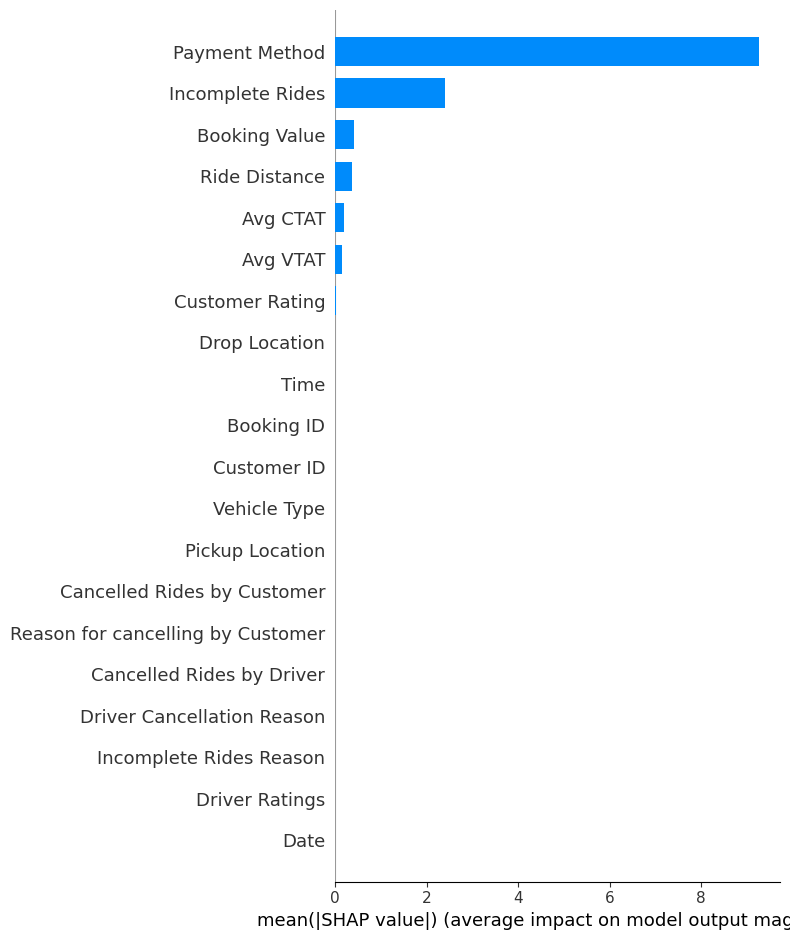

In [42]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# V√©rifier si shap_values_xgb est une liste (multi-classes) ou matrice
if isinstance(shap_values_xgb, list):
    # Binaire ‚Üí prendre la classe positive
    shap.summary_plot(shap_values_xgb[1], X_test, plot_type="bar")
else:
    # Matrice unique
    shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")


**Conclusion**

**Probl√©matique** :
L‚Äôobjectif √©tait de pr√©dire si une r√©servation serait compl√©t√©e ou annul√©e afin de r√©duire les pertes financi√®res et am√©liorer la satisfaction client et chauffeur.

R√©sultats cl√©s :
Le mod√®le (For√™t Al√©atoire / XGBoost) a identifi√© 6 variables principales influen√ßant le statut des r√©servations :

Payment Method ‚Üí La m√©thode de paiement a un fort impact sur les annulations.

Rides incompl√®tes (Incomplete Rides)

  -Un historique de courses incompl√®tes est un fort pr√©dicteur de comportements futurs.

  -Un client qui annule souvent est plus susceptible d‚Äôannuler encore.

Ride Distance ‚Üí Les trajets longs ou courts ont un effet significatif sur la compl√©tion.

Booking Value ‚Üí Les courses avec certains montants sont plus susceptibles d‚Äô√™tre annul√©es.

avg ctat (Customer Rating) ‚Üí Les clients avec des notes moyennes faibles peuvent √™tre plus √† risque d‚Äôannuler.

avg vtat (Driver Rating) ‚Üí La note moyenne du chauffeur influence √©galement la probabilit√© de compl√©tion.

**Interpr√©tation** :

Ces 6 features repr√©sentent les facteurs principaux que le mod√®le utilise pour pr√©dire l‚Äôannulation ou la compl√©tion d‚Äôune course.

Les autres features ont un impact moins significatif selon le SHAP bar plot.

üîπ Recommandations business

Optimiser la m√©thode de paiement :

Encourager les m√©thodes les moins associ√©es aux annulations (ex. paiement en ligne plut√¥t qu‚Äôen esp√®ces).

R√©duire les courses incompl√®tes avec des p√©nalit√©s douces ou des r√©compenses de fid√©lit√©.

Gestion des trajets :

Adapter la disponibilit√© des v√©hicules selon la distance : trajets tr√®s longs ou tr√®s courts pourraient n√©cessiter une attention particuli√®re.

Focus sur la valeur de la r√©servation :

Pour les courses co√ªteuses, pr√©voir des confirmations suppl√©mentaires ou des incentives pour √©viter les annulations.

Suivi des notes client et chauffeur :

Les clients ou chauffeurs avec des notes faibles pourraient √™tre cibl√©s pour des interventions pr√©ventives : communication proactive, r√©compenses pour fiabilit√©, etc.